<a href="https://colab.research.google.com/github/Hamashyach/AnaliseDados_projeto1/blob/main/ProjetoMusicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**M√∫sicas mais tocadas em 2024**

A base de dados Top Music 2024 √© um conjunto de dados contempor√¢neo que re√∫ne informa√ß√µes sobre as m√∫sicas mais populares de 2024 em diversas plataformas digitais, como Spotify, YouTube, TikTok, Apple Music, entre outras. Ela cont√©m registros detalhados de m√©tricas de engajamento, como n√∫mero de execu√ß√µes, visualiza√ß√µes, curtidas, presen√ßa em playlists e √≠ndices de popularidade. A base possui 4600 registros e 29 vari√°veis. Seu objetivo √© permitir a an√°lise de padr√µes que influenciam a popularidade musical e o impacto das redes sociais na difus√£o das faixas.

**Desafios de an√°lise:**

* Identificar padr√µes musicais que impulsionam popularidade.

* Avaliar impacto de diferentes m√≠dias sociais na divulga√ß√£o de m√∫sicas.

* Analisar m√©tricas de engajamento ao longo do tempo.


**Contexto Empresarial:**

* Esta base pode ser extremamente √∫til para gravadoras, plataformas de streaming, ag√™ncias de marketing musical e artistas, pois permite:

* Identificar padr√µes que impulsionam o sucesso de uma faixa.

* Avaliar o impacto das redes sociais na popularidade das m√∫sicas.

* Apoiar decis√µes estrat√©gicas de divulga√ß√£o e investimento com base em dados reais de engajamento.


## **Dicion√°rio das vari√°veis**

**Track Name:** Nome da m√∫sica.

**Album Name:** √Ålbum.

**Artist:** Artista(s).

**Release Date:** Data de lan√ßamento.

**ISRC:** C√≥digo internacional da faixa.

**All Time Rank:** Posi√ß√£o no ranking hist√≥rico.

**Track Score:** Nota atribu√≠da √† faixa.

**Spotify Streams:** Execu√ß√µes no Spotify.

**Spotify Playlist Count:** Presen√ßa em playlists do Spotify.

**Spotify Playlist Reach:** Alcance nas playlists do Spotify.

**Spotify Popularity:** Popularidade no Spotify.

**YouTube Views:** Visualiza√ß√µes no YouTube.

**YouTube Likes:** Curtidas no YouTube.

**TikTok Posts:** Publica√ß√µes no TikTok.

**TikTok Likes:** Curtidas no TikTok.

**TikTok Views:** Visualiza√ß√µes no TikTok.

**YouTube Playlist Reach:** Alcance nas playlists do YouTube.

**Apple Music Playlist Count:** Presen√ßa em playlists da Apple Music.

**AirPlay Spins:** Execu√ß√µes em r√°dios.

**SiriusXM Spins:** Execu√ß√µes na SiriusXM.

**Deezer Playlist Count:** Presen√ßa em playlists do Deezer.

**Deezer Playlist Reach:** Alcance nas playlists do Deezer.

**Amazon Playlist Count:** Presen√ßa em playlists da Amazon.

**Pandora Streams:** Execu√ß√µes na Pandora.

**Pandora Track Stations:** Esta√ß√µes da Pandora com a faixa.

**Soundcloud Streams:** Execu√ß√µes no SoundCloud.

**Shazam Counts:** N√∫mero de identfica√ß√µes no Shazam.

**TIDAL Popularity:** Popularidade no TIDAL.

**Explicit Track:** Cont√©m conte√∫do expl√≠cito (Sim/N√£o).














In [116]:
#pacotes necess√°rios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#importar o arquivo dos dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/05_muÃÅsicas_mais_tocadas.csv', encoding='latin-1')
print("Formato da base (linhas, colunas): ", df.shape)

#Verificar os tipos de dados
print(f'\nOs tipos dos atributos s√£o do tipo:\n{df.dtypes}')

# Vis√£o geral
print("\nColunas dispon√≠veis:")
print(df.columns.tolist())

print("\n10 Primeiras linhas da base:")
df.head(10)



Formato da base (linhas, colunas):  (4600, 29)

Os tipos dos atributos s√£o do tipo:
Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pan

Track                                    Album Name  \
0         MILLION DOLLAR BABY                  Million Dollar Baby - Single   
1                 Not Like Us                                   Not Like Us   
2  i like the way you kiss me                    I like the way you kiss me   
3                     Flowers                              Flowers - Single   
4                     Houdini                                       Houdini   
5                 Lovin On Me                                   Lovin On Me   
6            Beautiful Things                              Beautiful Things   
7                   Gata Only                                     Gata Only   
8        Danza Kuduro - Cover  √Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω - √Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω√Ω -   
9  BAND4BAND (feat. Lil Baby)                    BAND4BAND (feat. Lil Baby)   

           Artist Release Date          ISRC All Time Rank  Track Score  \
0   Tommy Richman    4/26/2024  QM24S2402528             1        725.4   
1  Kendrick Lamar     5/4/2024  USUG12400910             2        545.9   
2         Artemas    3/19/2024  QZJ842400387             3        538.4   
3     Miley Cyrus    1/12/2023  USSM12209777             4        444.9   
4          Eminem    5/31/2024  USUG12403398             5        423.3   
5     Jack Harlow   11/10/2023  USAT22311371             6        410.1   
6    Benson Boone    1/18/2024  USWB12307016             7        407.2   
7      FloyyMenor     2/2/2024  QZL382406049             8        375.8   
8   MUSIC LAB JPN     6/9/2024  TCJPA2463708             9        355.7   
9     Central Cee    5/23/2024  USSM12404354            10        330.6   

  Spotify Streams Spotify Playlist Count Spotify Playlist Reach  ...  \
0     390,470,936                 30,716            196,631,588  ...   
1     323,703,884                 28,113            174,597,137  ...   
2     601,309,283                 54,331            211,607,669  ...   
3   2,031,280,633                269,802            136,569,078  ...   
4     107,034,922                  7,223            151,469,874  ...   
5     670,665,438                105,892            175,421,034  ...   
6     900,158,751                 73,118            201,585,714  ...   
7     675,079,153                 40,094            211,236,940  ...   
8   1,653,018,119                      1                     15  ...   
9      90,676,573                 10,400            184,199,419  ...   

   SiriusXM Spins Deezer Playlist Count Deezer Playlist Reach  \
0             684                  62.0            17,598,718   
1               3                  67.0            10,422,430   
2             536                 136.0            36,321,847   
3           2,182                 264.0            24,684,248   
4               1                  82.0            17,660,624   
5           4,654                  86.0            17,167,254   
6             429                 168.0            48,197,850   
7              30                  87.0            33,245,595   
8             NaN                   NaN                   NaN   
9             117                  78.0            10,800,098   

  Amazon Playlist Count Pandora Streams Pandora Track Stations  \
0                 114.0      18,004,655                 22,931   
1                 111.0       7,780,028                 28,444   
2                 172.0       5,022,621                  5,639   
3                 210.0     190,260,277                203,384   
4                 105.0       4,493,884                  7,006   
5                 152.0     138,529,362                 50,982   
6                 154.0      65,447,476                 57,372   
7                  53.0       3,372,428                  5,762   
8                   NaN             NaN                    NaN   
9                  92.0       1,005,626                    842   

  Soundcloud Streams  Shazam Counts TIDAL Popularity 

De inicio notamos como o dataset √© extenso e com muitas informa√ß√µes.



In [4]:
#Valores nulos ordenados em ordem decrescente
print("\nValores nulos por coluna:")
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)



Valores nulos por coluna:


TIDAL Popularity              100.000000
Soundcloud Streams             72.456522
SiriusXM Spins                 46.152174
Pandora Track Stations         27.565217
TikTok Posts                   25.500000
Pandora Streams                24.043478
Amazon Playlist Count          22.934783
YouTube Playlist Reach         21.934783
TikTok Views                   21.326087
TikTok Likes                   21.304348
Deezer Playlist Reach          20.173913
Deezer Playlist Count          20.021739
Spotify Popularity             17.478261
Shazam Counts                  12.543478
Apple Music Playlist Count     12.195652
AirPlay Spins                  10.826087
YouTube Likes                   6.847826
YouTube Views                   6.695652
Spotify Streams                 2.456522
Spotify Playlist Reach          1.565217
Spotify Playlist Count          1.521739
Artist                          0.108696
All Time Rank                   0.000000
Track Score                     0.000000
ISRC                            0.000000
Track                           0.000000
Album Name                      0.000000
Release Date                    0.000000
Explicit Track                  0.000000
dtype: float64

 Verificamos que existe muitos valores nulos, principalmente na v√°ri√°vel TIDAL Popularity que possui 100% de valores nulos, decidimos ent√£o remove-la por completo e fazer uma limpeza desses dados.

In [5]:
#Fazer uma c√≥pia da base
df_limpo = df.copy()

# Faz uma c√≥pia da base para limpeza
df_limpo = df.copy()

# Lista de colunas com n√∫meros em formato de texto (com v√≠rgula)
colunas_com_virgula = [
    'Spotify Streams', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
    'Deezer Playlist Reach', 'Pandora Streams', 'Soundcloud Streams', 'Shazam Counts'
]

# Converte colunas com v√≠rgulas para float
for col in colunas_com_virgula:
    if col in df_limpo.columns:
        df_limpo[col] = df_limpo[col].astype(str).str.replace(',', '')
        df_limpo[col] = pd.to_numeric(df_limpo[col], errors='coerce')

# Converte a coluna de data
df_limpo['Release Date'] = pd.to_datetime(df_limpo['Release Date'], errors='coerce')

# Converte valores bin√°rios para 'Sim' e 'N√£o'
df_limpo['Explicit Track'] = df_limpo['Explicit Track'].map({0: 'N√£o', 1: 'Sim'})

# Remove colunas desnecess√°rias
df_limpo.drop(columns=['TIDAL Popularity', 'ISRC'], inplace=True)

# Remove linhas com muitos valores nulos
df_limpo = df_limpo[df_limpo.isnull().sum(axis=1) < 10]

# Remove duplicatas
linhas_antes = df_limpo.shape[0]
df_limpo.drop_duplicates(inplace=True)
linhas_depois = df_limpo.shape[0]
if linhas_depois < linhas_antes:
    print(f"{linhas_antes - linhas_depois} linhas duplicadas foram removidas.")
else:
    print("Nenhuma linha duplicada foi encontrada ou removida.")

# Visualiza o tamanho final e as primeiras linhas
print("Base ap√≥s limpeza:", df_limpo.shape)
display(df_limpo.head(10))


2 linhas duplicadas foram removidas.
Base ap√≥s limpeza: (4028, 27)


<ipython-input-5-0ec3707687bf>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo.drop_duplicates(inplace=True)


Track                    Album Name  \
0                     MILLION DOLLAR BABY  Million Dollar Baby - Single   
1                             Not Like Us                   Not Like Us   
2              i like the way you kiss me    I like the way you kiss me   
3                                 Flowers              Flowers - Single   
4                                 Houdini                       Houdini   
5                             Lovin On Me                   Lovin On Me   
6                        Beautiful Things              Beautiful Things   
7                               Gata Only                     Gata Only   
9              BAND4BAND (feat. Lil Baby)    BAND4BAND (feat. Lil Baby)   
10  I Had Some Help (feat. Morgan Wallen)               I Had Some Help   

            Artist Release Date All Time Rank  Track Score  Spotify Streams  \
0    Tommy Richman   2024-04-26             1        725.4     3.904709e+08   
1   Kendrick Lamar   2024-05-04             2        545.9     3.237039e+08   
2          Artemas   2024-03-19             3        538.4     6.013093e+08   
3      Miley Cyrus   2023-01-12             4        444.9     2.031281e+09   
4           Eminem   2024-05-31             5        423.3     1.070349e+08   
5      Jack Harlow   2023-11-10             6        410.1     6.706654e+08   
6     Benson Boone   2024-01-18             7        407.2     9.001588e+08   
7       FloyyMenor   2024-02-02             8        375.8     6.750792e+08   
9      Central Cee   2024-05-23            10        330.6     9.067657e+07   
10     Post Malone   2024-05-10            11        322.1     2.500804e+08   

   Spotify Playlist Count  Spotify Playlist Reach  Spotify Popularity  ...  \
0                  30,716             196631588.0                92.0  ...   
1                  28,113             174597137.0                92.0  ...   
2                  54,331             211607669.0                92.0  ...   
3                 269,802             136569078.0                85.0  ...   
4                   7,223             151469874.0                88.0  ...   
5                 105,892             175421034.0                83.0  ...   
6                  73,118             201585714.0                86.0  ...   
7                  40,094             211236940.0                92.0  ...   
9                  10,400             184199419.0                86.0  ...   
10                 16,219             168766158.0                91.0  ...   

    AirPlay Spins  SiriusXM Spins  Deezer Playlist Count  \
0          40,975             684                   62.0   
1          40,778               3                   67.0   
2          74,333             536                  136.0   
3       1,474,799           2,182                  264.0   
4          12,185               1                   82.0   
5         522,042           4,654                   86.0   
6         383,478             429                  168.0   
7          17,221              30                   87.0   
9           3,823             117                   78.0   
10         62,312              71                   60.0   

    Deezer Playlist Reach  Amazon Playlist Count  Pandora Streams  \
0              17598718.0                  114.0       18004655.0   
1              10422430.0                  111.0        7780028.0   
2              36321847.0                  172.0        5022621.0   
3              24684248.0                  210.0      190260277.0   
4              17660624.0                  105.0        4493884.0   
5              17167254.0                  152.0      138529362.0   
6              48197850.0                  154.0       65447476.0   
7              33245595.0                   53.0        3372428.0   
9              10800098.0                   92.0        1005626.0   
10             12009073.0                  114.0       23155471.0   

    Pandora Track Stations Soundcloud Streams Shazam Counts 

**Limpeza**


*  Fizemos uma c√≥pia da tabela de dados para n√£o alterar a tabela original

*    Removemos a coluna TIDAL Popularity e coluna ISRC

* Convertemos valores que eram object(por conta da virgula) em float.

* Garantimos que as datas de lan√ßamento est√° do tipo data

*  Remove linhas com uma quantidade muito grande de nulos

* Remove linhas duplicadas

* Visualizar a base limpa




In [114]:
#Descri√ß√£o estat√≠sticas dos dados
df_limpo.describe()

Release Date  Track Score  Spotify Streams  \
count                           4028  4028.000000     4.024000e+03   
mean   2020-11-11 08:51:35.928500736    41.759037     4.615664e+08   
min              1987-07-21 00:00:00    19.400000     4.522000e+03   
25%              2019-04-18 00:00:00    23.500000     9.283001e+07   
50%              2022-03-07 00:00:00    30.000000     2.616871e+08   
75%              2023-07-12 06:00:00    44.700000     6.478156e+08   
max              2024-06-12 00:00:00   725.400000     4.281469e+09   
std                              NaN    38.235171     5.252015e+08   

       Spotify Playlist Reach  Spotify Popularity  YouTube Views  \
count            4.028000e+03         3603.000000   3.949000e+03   
mean             2.605772e+07           65.287538   3.862069e+08   
min              2.900000e+01            1.000000   9.130000e+02   
25%              7.053215e+06           62.000000   4.093895e+07   
50%              1.568796e+07           67.000000   1.447743e+08   
75%              3.280956e+07           73.000000   4.501212e+08   
max              2.623434e+08           96.000000   1.632276e+10   
std              3.031802e+07           13.521407   6.839873e+08   

       YouTube Likes  TikTok Posts  TikTok Likes  TikTok Views  \
count   3.946000e+03  3.318000e+03  3.501000e+03  3.500000e+03   
mean    2.935118e+06  8.736788e+05  1.121031e+08  1.148809e+09   
min     2.500000e+01  1.000000e+00  3.000000e+00  1.900000e+01   
25%     4.278695e+05  3.763250e+04  5.979412e+06  5.944088e+07   
50%     1.285850e+06  1.733990e+05  2.705406e+07  2.659906e+08   
75%     3.591284e+06  7.304260e+05  9.436800e+07  9.068123e+08   
max     6.231118e+07  3.772646e+07  2.347422e+10  2.332323e+11   
std     4.603147e+06  2.275158e+06  5.534820e+08  5.929012e+09   

       YouTube Playlist Reach  Apple Music Playlist Count  \
count            3.446000e+03                 3887.000000   
mean             3.421557e+08                   55.884744   
min              1.000000e+00                    1.000000   
25%              1.154156e+07                   11.000000   
50%              9.387865e+07                   29.000000   
75%              3.059424e+08                   72.000000   
max              7.289707e+09                  859.000000   
std              6.751231e+08                   72.248931   

       Deezer Playlist Count  Deezer Playlist Reach  Amazon Playlist Count  \
count            3625.000000           3.618000e+03            3464.000000   
mean               32.709517           1.301267e+06              25.721420   
min                 1.000000           1.000000e+00               1.000000   
25%                 5.000000           5.425225e+04               8.000000   
50%                15.000000           2.392015e+05              18.000000   
75%                38.000000           9.074285e+05              35.000000   
max               632.000000           4.819785e+07             210.000000   
std                54.571568           3.571106e+06              26.102024   

       Pandora Streams  Soundcloud Streams  Shazam Counts  Total_Playlists  \
count     3.420000e+03        1.243000e+03   3.778000e+03     4.028000e+03   
mean      8.536090e+07        1.457425e+07   2.512438e+06     2.605782e+07   
min       2.000000e+00        1.800000e+01   7.500000e+01     2.900000e+01   
25%       1.084318e+06        7.899425e+05   2.861968e+05     7.053263e+06   
50%       1.273577e+07        3.308660e+06   9.572035e+05     1.568800e+07   
75%       8.054493e+07        1.337581e+07   2.867504e+06     3.280969e+07   
max       1.463624e+09        3.198359e+08   4.484264e+07     2.623440e+08   
std       1.675487e+08        3.132903e+07   4.050168e+06     3.031812e+07   

       Total_Playlist_Reach  
count          3.229000e+03  
mean           3.199007e+07  
min            2.423710e+05  
25%            1.068603e+07  
50%            2.058865e+07  
75%            3.998364e+07  
max            3.03

**An√°lise Estat√≠stica Descritiva**

* A popularidade no Spotify apresenta m√©dia elevada (65), indicando que as m√∫sicas analisadas tem maior alcance na plataforma. A dispers√£o √© moderada (desvio padr√£o ‚âà13), o que sugere consist√™ncia entre os valores, com poucos extremos.

* As vari√°veis relacionadas a playlists Apple Music, Deezer, Amazon mostram alta assimetria: poucas m√∫sicas aparecem em muitas playlists, enquanto a maioria tem participa√ß√£o limitada. Isso evidencia uma distribui√ß√£o desigual de visibilidade nessas plataformas.

* O Track Score revela forte concentra√ß√£o de destaque em poucas faixas. A m√©dia est√° em 41, mas h√° m√∫sicas com pontua√ß√£o acima de 700, o que demonstra que poucas m√∫sicas dominam amplamente os rankings.

* A variabilidade entre as plataformas √© significativa. Enquanto m√∫sicas no YouTube alcan√ßam bilh√µes de visualiza√ß√µes, outras plataformas como Deezer e Amazon possuem alcances bem mais modestos, sugerindo que certas m√≠dias favorecem artistas ou g√™neros espec√≠ficos.

* Al√©m disso, a presen√ßa de outliers elevados (sobretudo em visualiza√ß√µes e streams) afeta a m√©dia geral e mostra que algumas faixas se tornam fen√¥menos virais, principalmente no YouTube, TikTok e Soundcloud.

5. Tipo de distribui√ß√£o

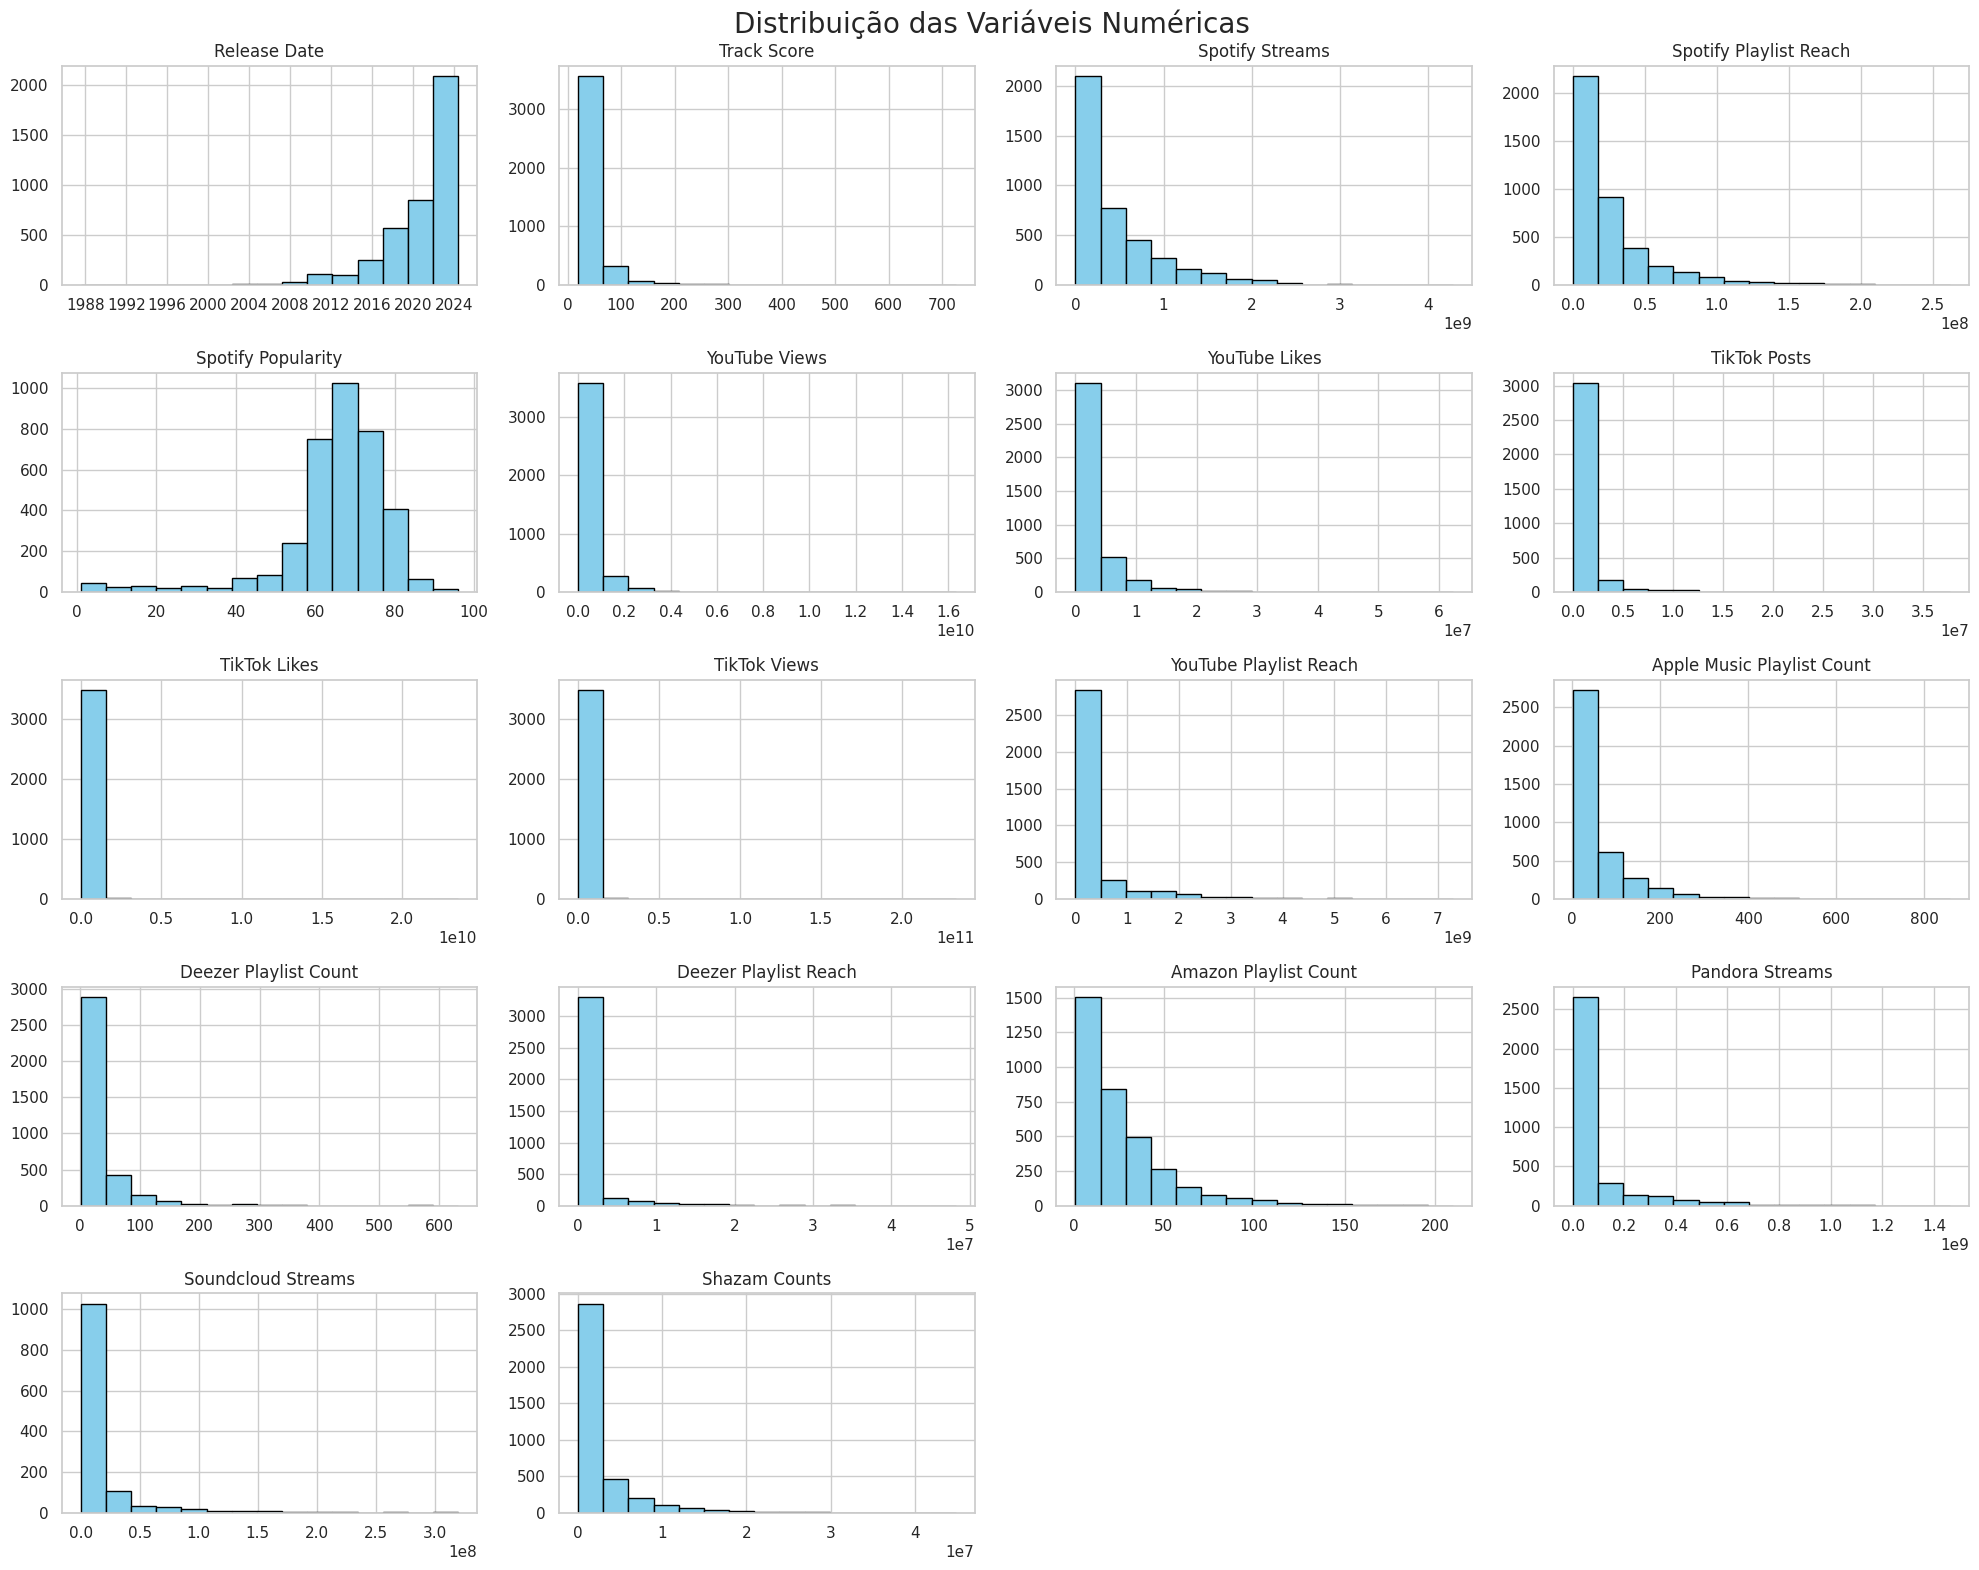

In [7]:
# Ajuste do estilo dos gr√°ficos
sns.set_theme(style="whitegrid", palette='rocket')

# Gera todos os histogramas de colunas num√©ricas do df_limpo
df_limpo.hist(bins=15, figsize=(20, 16), color='skyblue', edgecolor='black')
plt.suptitle('Distribui√ß√£o das Vari√°veis Num√©ricas', fontsize=20)
plt.tight_layout()
plt.show()

**An√°lise dos Histogramas**

* Notamos que alguns dos histogramas revelam distribui√ß√µes assim√©tricas √† direita em grande parte dos dados, como Spotify Streams, TikTok Views e Youtube Views. Isso significa que a maioria das m√∫sicas apresentam valores baixos, enquanto poucas faixas obt√™m valores muito altos (hits virais).

* J√° no Spotify Popularty podemos notar uma distribui√ß√£o mais concentrada em faixas m√©dias-altas, o que indica que muitas m√∫sicas s√£o bem avaliadas ou populares dentrode um padr√£o esperado. Enquanto os histogramas como Souncloud Streams e Amazon playlist Count a distribui√ß√£o dos dados √© mais irregular. Isso mostra que nem todas as m√∫sicas est√£o presentes ou t√™m o mesmo destaque nessas m√≠dias.

* De forma geral, os gr√°ficos mostram um padr√£o comum do consumo digital: poucas m√∫sicas ganham muita aten√ß√£o e a maioria tem um desempenho mais discreto, um reflexo do funcionamento dos algoritmos e da viraliza√ß√£o nas redes.

# 5.1 Medidas de tend√™ncia central e dispers√£o

**5.1.1 Qual a m√©dia de alcance musical de cada plataforma?**

M√©dia de Alcance das M√∫sicas por Plataforma:
TikTok Views                  1.148809e+09
YouTube Playlist Reach        3.421557e+08
Pandora Streams               8.536090e+07
Spotify Playlist Reach        2.605772e+07
Soundcloud Streams            1.457425e+07
Deezer Playlist Reach         1.301267e+06
Apple Music Playlist Count    5.588474e+01
Amazon Playlist Count         2.572142e+01
dtype: float64


<ipython-input-8-4cf39a4bf603>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alcance_media.values, y=alcance_media.index, palette="viridis")


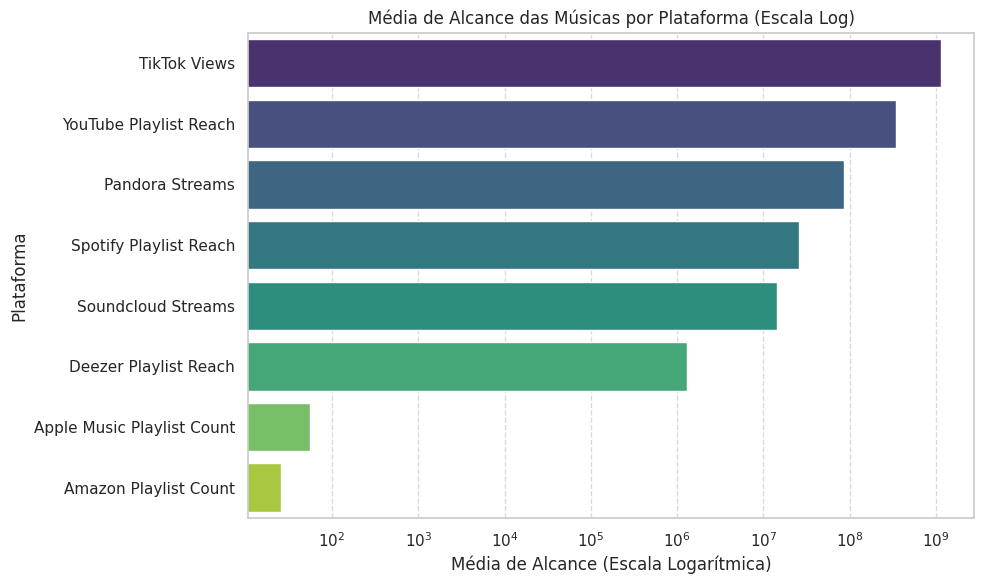

In [8]:
# Lista de colunas que representam alcance em diferentes plataformas
colunas_alcance = [
    'Spotify Playlist Reach',
    'YouTube Playlist Reach',
    'TikTok Views',
    'Apple Music Playlist Count',
    'Deezer Playlist Reach',
    'Amazon Playlist Count',
    'Pandora Streams',
    'Soundcloud Streams'
]

# Garante que as colunas est√£o presentes e num√©ricas
alcance_media = df_limpo[colunas_alcance].mean().dropna().sort_values(ascending=False)

# Exibe as m√©dias
print("M√©dia de Alcance das M√∫sicas por Plataforma:")
print(alcance_media)

# Gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=alcance_media.values, y=alcance_media.index, palette="viridis")
plt.xscale('log')
plt.xlabel("M√©dia de Alcance (Escala Logar√≠tmica)")
plt.ylabel("Plataforma")
plt.title("M√©dia de Alcance das M√∫sicas por Plataforma (Escala Log)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**An√°lise Estat√≠stica Descritiva do Alcance por Plataforma**

* O TikTok domina o alcance, com uma m√©dia de 1,15 bilh√£o de visualiza√ß√µes, o que indica a forte influ√™ncia dessa olataforma na viraliza√ß√£o de m√∫sicas.

* YouTube Playlist Reach aparece em segundo lugar com 342 milh√µes, destacando-se como uma das principais plataformas de descoberta e consumo musical em massa.

* Apesar do Spotify estar em quarto lugar, com uma m√©dia de 26 milh√µes, ele ainda √© muito relevante por sua presen√ßa em playlists curadas, o que imapacta na descoberta de faixas.

* J√° a Apple Music e Amanzon Playlist tem m√©dias muito baixas o que pode ser causado por possuir poucos usu√°rios com playlists publicas.

**5.1.2 Mediana e Desvio Padr√£o por Plataforma**





In [9]:
# Calcula a mediana
mediana_alcance = df_limpo[colunas_alcance].median().dropna().sort_values(ascending=False)

# Calcula o desvio padr√£o
desvio_padrao_alcance = df_limpo[colunas_alcance].std().dropna().sort_values(ascending=False)

# Exibe os resultados
print("üìä Mediana de Alcance por Plataforma:")
print(mediana_alcance)

print("\nüìà Desvio Padr√£o de Alcance por Plataforma:")
print(desvio_padrao_alcance)

üìä Mediana de Alcance por Plataforma:
TikTok Views                  265990638.5
YouTube Playlist Reach         93878654.5
Spotify Playlist Reach         15687960.5
Pandora Streams                12735768.5
Soundcloud Streams              3308660.0
Deezer Playlist Reach            239201.5
Apple Music Playlist Count           29.0
Amazon Playlist Count                18.0
dtype: float64

üìà Desvio Padr√£o de Alcance por Plataforma:
TikTok Views                  5.929012e+09
YouTube Playlist Reach        6.751231e+08
Pandora Streams               1.675487e+08
Soundcloud Streams            3.132903e+07
Spotify Playlist Reach        3.031802e+07
Deezer Playlist Reach         3.571106e+06
Apple Music Playlist Count    7.224893e+01
Amazon Playlist Count         2.610202e+01
dtype: float64


* TikTok e YouTube: Alt√≠ssima m√©dia e desvio padr√£o ‚Äî poucas m√∫sicas explodem, a maioria tem alcance baixo.

* Spotify e Pandora: Tamb√©m s√£o desiguais, mas menos extremos.

* SoundCloud e Deezer: Alcance mais modesto, ainda com forte varia√ß√£o.

* Apple e Amazon: Distribui√ß√£o mais est√°vel, com menor alcance e menor desigualdade.

**5.1.3 Gr√°fico de Dispers√£o (Boxplot) e An√°lise de Outliers**

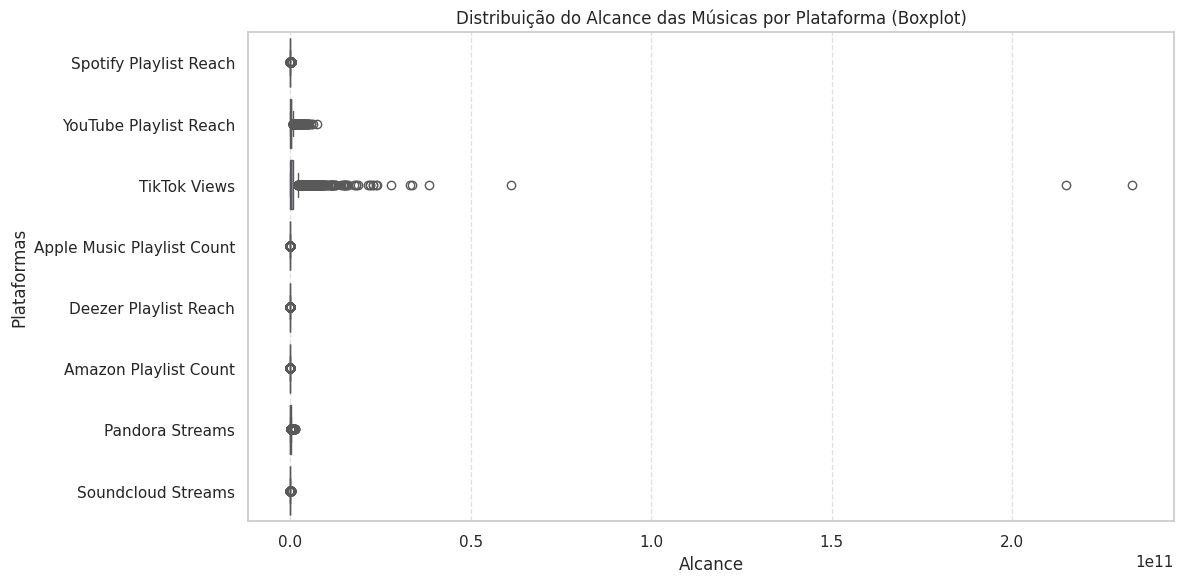

In [10]:
# Boxplot para alcance nas plataformas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_limpo[colunas_alcance], orient='h', palette='Set2')
plt.title("Distribui√ß√£o do Alcance das M√∫sicas por Plataforma (Boxplot)")
plt.xlabel("Alcance")
plt.ylabel("Plataformas")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**An√°lise de Outliers com Boxplots**

* TikTok Views: Extremamente assim√©trico. Muitos outliers com valores alt√≠ssimos indicam que poucas m√∫sicas viralizam fortemente, enquanto a maioria tem alcance mediano ou baixo.

* YouTube Playlist Reach e Spotify Playlist Reach: Tamb√©m mostram assimetria, com outliers relevantes ‚Äî evidenciando que poucas faixas s√£o impulsionadas por grandes playlists.

* Pandora e SoundCloud Streams: Alta dispers√£o e presen√ßa de outliers, mas menos extremos do que TikTok.

* Deezer, Apple Music e Amazon: Alcance mais concentrado, com poucos ou nenhum outlier. Isso indica distribui√ß√£o mais homog√™nea e limitada em alcance.

5.1.4 Removendo Outliers

In [11]:
#Verificando Outliers
for col in colunas_alcance:
    serie = df_limpo[col].dropna()  # remove nulos
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    outliers = serie[(serie < Q1 - 1.5 * IQR) | (serie > Q3 + 1.5 * IQR)]
    print(f'{col}: {len(outliers)} outliers')

Spotify Playlist Reach: 333 outliers
YouTube Playlist Reach: 413 outliers
TikTok Views: 403 outliers
Apple Music Playlist Count: 300 outliers
Deezer Playlist Reach: 424 outliers
Amazon Playlist Count: 200 outliers
Pandora Streams: 466 outliers
Soundcloud Streams: 149 outliers


In [12]:
#Fazemos uma c√≥pia para n√£o alterar o original
df_sem_outliers = df_limpo.copy()

# Remo√ß√£o de outliers com base no IQR
for col in colunas_alcance:
    Q1 = df_sem_outliers[col].quantile(0.25)
    Q3 = df_sem_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Mantem apenas os dados dentro dos limites
    df_sem_outliers = df_sem_outliers[
        (df_sem_outliers[col] >= limite_inferior) & (df_sem_outliers[col] <= limite_superior)
    ]

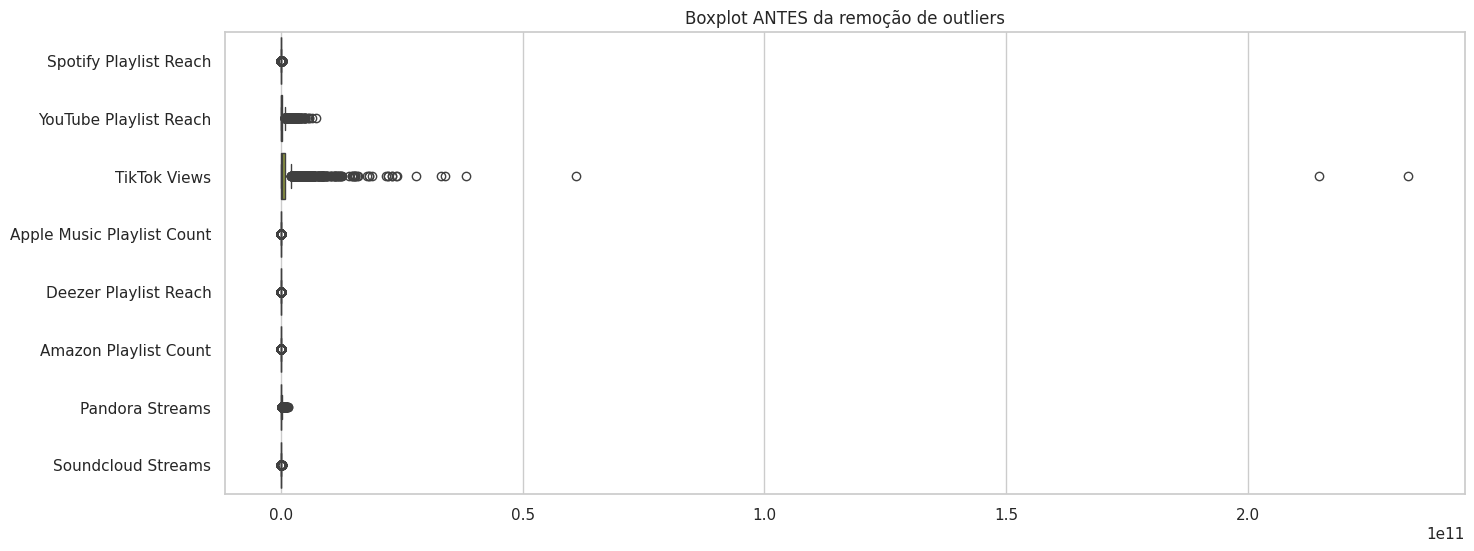

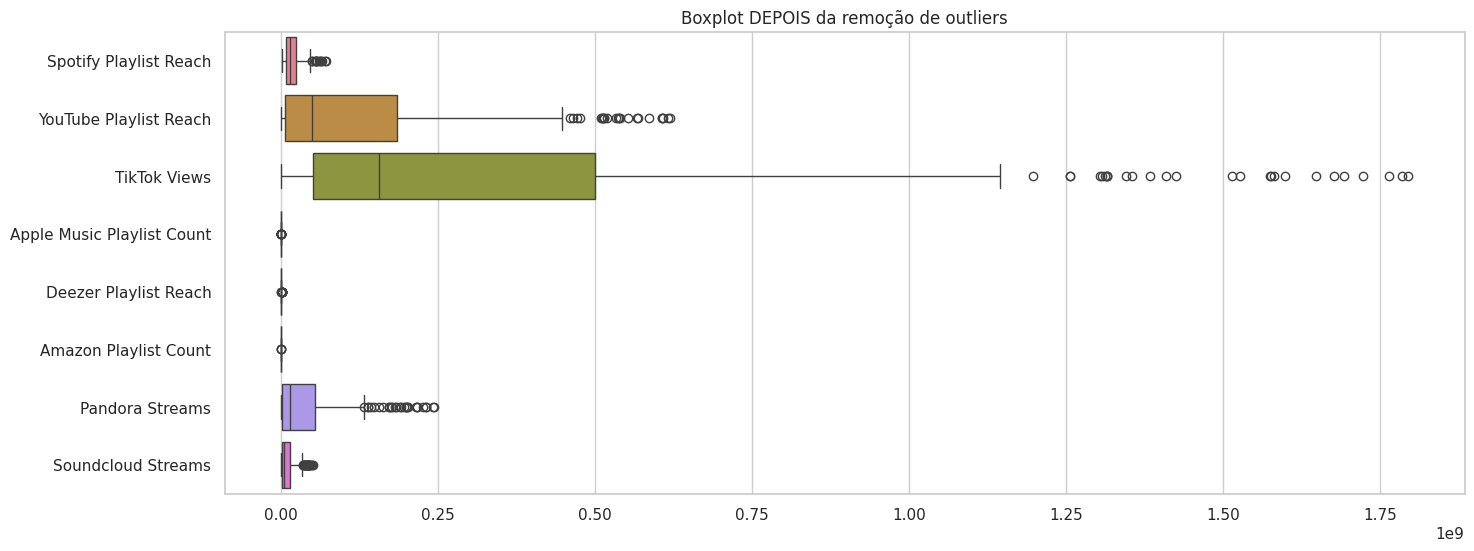

In [13]:
# Boxplot antes da remo√ß√£o de outliers
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_limpo[colunas_alcance], orient='h')
plt.title('Boxplot ANTES da remo√ß√£o de outliers')
plt.show()

# Boxplot depois da remo√ß√£o de outliers
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_sem_outliers[colunas_alcance], orient='h')
plt.title('Boxplot DEPOIS da remo√ß√£o de outliers')
plt.show()

In [14]:
# 1. Quantidade de dados antes e depois
print(f"N¬∫ de registros ANTES da remo√ß√£o de outliers: {df_limpo.shape[0]}")
print(f"N¬∫ de registros DEPOIS da remo√ß√£o de outliers: {df_sem_outliers.shape[0]}")
print(f"N¬∫ de registros REMOVIDOS: {df_limpo.shape[0] - df_sem_outliers.shape[0]}\n")

# 2. Estat√≠sticas descritivas para compara√ß√£o
print("üìä Estat√≠sticas ANTES da remo√ß√£o de outliers:")
display(df_limpo[colunas_alcance].describe().T)

print("\nüìä Estat√≠sticas DEPOIS da remo√ß√£o de outliers:")
display(df_sem_outliers[colunas_alcance].describe().T)

N¬∫ de registros ANTES da remo√ß√£o de outliers: 4028
N¬∫ de registros DEPOIS da remo√ß√£o de outliers: 341
N¬∫ de registros REMOVIDOS: 3687

üìä Estat√≠sticas ANTES da remo√ß√£o de outliers:


count          mean           std   min  \
Spotify Playlist Reach      4028.0  2.605772e+07  3.031802e+07  29.0   
YouTube Playlist Reach      3446.0  3.421557e+08  6.751231e+08   1.0   
TikTok Views                3500.0  1.148809e+09  5.929012e+09  19.0   
Apple Music Playlist Count  3887.0  5.588474e+01  7.224893e+01   1.0   
Deezer Playlist Reach       3618.0  1.301267e+06  3.571106e+06   1.0   
Amazon Playlist Count       3464.0  2.572142e+01  2.610202e+01   1.0   
Pandora Streams             3420.0  8.536090e+07  1.675487e+08   2.0   
Soundcloud Streams          1243.0  1.457425e+07  3.132903e+07  18.0   

                                    25%          50%           75%  \
Spotify Playlist Reach       7053215.00   15687960.5  3.280956e+07   
YouTube Playlist Reach      11541556.25   93878654.5  3.059424e+08   
TikTok Views                59440875.75  265990638.5  9.068123e+08   
Apple Music Playlist Count        11.00         29.0  7.200000e+01   
Deezer Playlist Reach          54252.25     239201.5  9.074285e+05   
Amazon Playlist Count              8.00         18.0  3.500000e+01   
Pandora Streams              1084317.50   12735768.5  8.054493e+07   
Soundcloud Streams            789942.50    3308660.0  1.337581e+07   

                                     max  
Spotify Playlist Reach      2.623434e+08  
YouTube Playlist Reach      7.289707e+09  
TikTok Views                2.332323e+11  
Apple Music Playlist Count  8.590000e+02  
Deezer Playlist Reach       4.819785e+07  
Amazon Playlist Count       2.100000e+02  
Pandora Streams             1.463624e+09  
Soundcloud Streams          3.198359e+08


üìä Estat√≠sticas DEPOIS da remo√ß√£o de outliers:


count          mean           std        min  \
Spotify Playlist Reach      341.0  1.801414e+07  1.307923e+07  1222888.0   
YouTube Playlist Reach      341.0  1.217102e+08  1.552442e+08      182.0   
TikTok Views                341.0  3.557770e+08  4.330157e+08     1420.0   
Apple Music Playlist Count  341.0  3.995015e+01  2.954549e+01        2.0   
Deezer Playlist Reach       341.0  2.309519e+05  2.429957e+05       54.0   
Amazon Playlist Count       341.0  1.658358e+01  1.175246e+01        1.0   
Pandora Streams             341.0  3.913374e+07  5.525052e+07        3.0   
Soundcloud Streams          341.0  9.630114e+06  1.190637e+07     2887.0   

                                   25%          50%          75%           max  
Spotify Playlist Reach       7954524.0   15063771.0   24096906.0  7.136634e+07  
YouTube Playlist Reach       7025105.0   49818215.0  185360520.0  6.186372e+08  
TikTok Views                51520600.0  155757311.0  500108092.0  1.794130e+09  
Apple Music Playlist Count        18.0         32.0         53.0  1.330000e+02  
Deezer Playlist Reach          41140.0     143492.0     347762.0  1.040628e+06  
Amazon Playlist Count              7.0         14.0         23.0  4.900000e+01  
Pandora Streams              1790458.0   14217098.0   54177152.0  2.440846e+08  
Soundcloud Streams           1367844.0    4254609.0   14784764.0  5.073752e+07

**Compara√ß√£o dos Boxplots com e sem Outliers**

* Ao fazer a remo√ß√£o dos outliers podemos ver que foram removidos 3.687 registros, essa remo√ß√£o afetou significamente a m√©dia e o desvio padr√£o de todas as plataformas, reduzindo de forma drastica os valores.

* As Plataformas como TikTok e Youtube apresentam outliers muito altos, o que indica a existencia de m√∫sicas consideradas(virais).

* Por conta dessa diferen√ßa, optei por manter os outliers na an√°lise, uma vez que refletem um comportamento real na ind√∫stria musical.

#6.Matriz de Correla√ß√£o entre vari√°veis num√©ricas

**6.1 Matriz de Correla√ß√£o com heatmap**

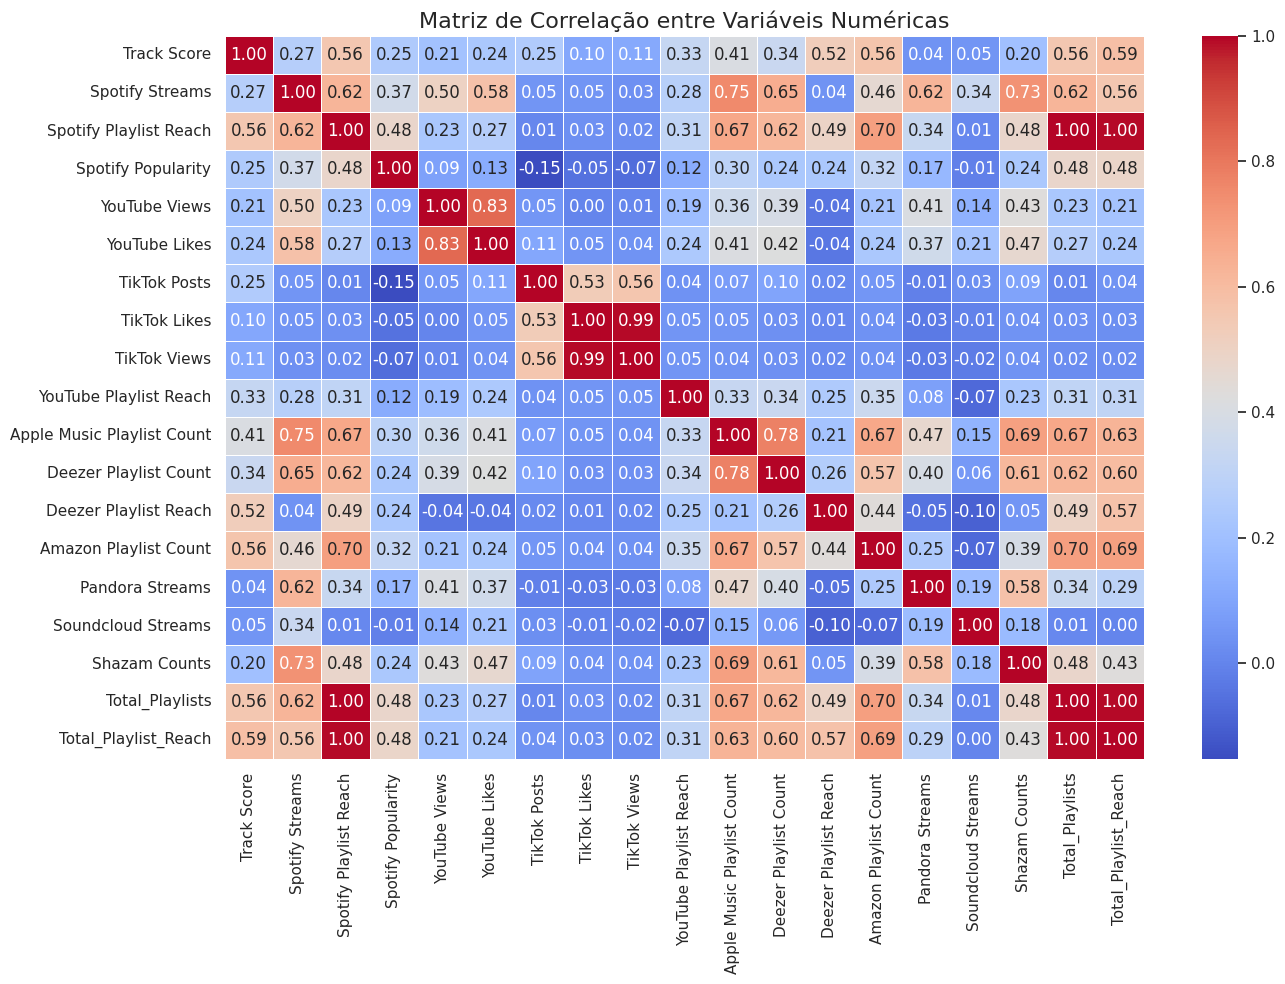

In [117]:
# Calcula a matriz de correla√ß√£o das vari√°veis num√©ricas
matriz_corr = df_limpo.corr(numeric_only=True)

plt.figure(figsize=(14, 10))

# Heatmap
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correla√ß√£o entre Vari√°veis Num√©ricas", fontsize=16)
plt.tight_layout()

* Podemos ver que TikTok, posts, likes e viewns possuem alta correla√ß√£o entre sim (at√© 0.99), o que indica que as m√∫sicas com mais postagens tamb√©m tendem a ter mais curtidas e visualiza√ß√µes no TikTok.

* O Youtube views e likes, tamb√©m possuem uma correla√ß√£o forte, j√° que videos mais vistos tendem a ter mais curtidas.

* J√° o Soundcloud Streams, Shazam Counts e Pandora Streams possuem correla√ß√£o fraca com a maioria das outras vari√°veis. Isso pode sugerir um comportamento de consumo mais independente nessas plataformas, ou ent√£o uma base de usu√°rios distinta.


#7. Hip√≥teses


**Hip√≥tese 1:  M√∫sicas com mais visualiza√ß√µes no TikTok tendem a ter mais execu√ß√µes no Spotify**

* H‚ÇÄ: N√£o h√° correla√ß√£o entre TikTok Views e Spotify Streams.

* H‚ÇÅ: Existe correla√ß√£o entre TikTok Views e Spotify Streams.



Correla√ß√£o de Pearson: 0.03
Valor-p: 0.0595


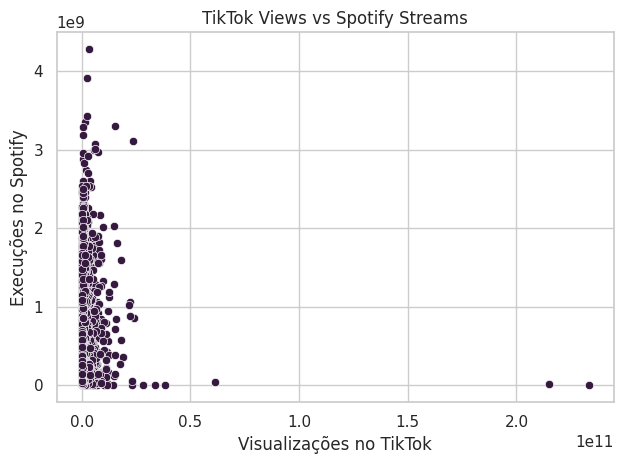

In [115]:
# Hip√≥tese 1
x = df_limpo['TikTok Views']
y = df_limpo['Spotify Streams']

# Remove nulos para an√°lise
df_corr = df_limpo[['TikTok Views', 'Spotify Streams']].dropna()

# C√°lculo de correla√ß√£o de Pearson
corr, p_valor = pearsonr(df_corr['TikTok Views'], df_corr['Spotify Streams'])

print(f"Correla√ß√£o de Pearson: {corr:.2f}")
print(f"Valor-p: {p_valor:.4f}")

# Visualiza√ß√£o
sns.scatterplot(x='TikTok Views', y='Spotify Streams', data=df_corr)
plt.title('TikTok Views vs Spotify Streams')
plt.xlabel('Visualiza√ß√µes no TikTok')
plt.ylabel('Execu√ß√µes no Spotify')
plt.tight_layout()
plt.show()

* Como o valor-p √© maior que 0.05, n√£o h√° evid√™ncia estat√≠stica suficiente para rejeitar H‚ÇÄ. Portanto, a an√°lise indica que n√£o existe uma rela√ß√£o linear significativa entre visualiza√ß√µes no TikTok e execu√ß√µes no Spotify nesta base de dados.

**Hip√≥tese 2 : "M√∫sicas com mais curtidas no YouTube tamb√©m possuem maior Track Score."**

* H‚ÇÄ: N√£o h√° correla√ß√£o entre YouTube Likes e Track Score.

* H‚ÇÅ: Existe correla√ß√£o entre YouTube Likes e Track Score.

Correla√ß√£o de Pearson: 0.24
Valor-p: 0.0000


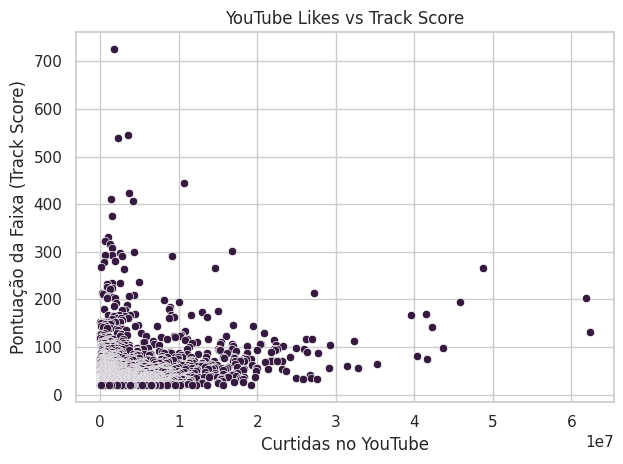

In [105]:
# Seleciona as vari√°veis
x = df_limpo['YouTube Likes']
y = df_limpo['Track Score']

# Remove nulos
df_corr2 = df_limpo[['YouTube Likes', 'Track Score']].dropna()

# Correla√ß√£o de Pearson
corr2, p_valor2 = pearsonr(df_corr2['YouTube Likes'], df_corr2['Track Score'])

print(f"Correla√ß√£o de Pearson: {corr2:.2f}")
print(f"Valor-p: {p_valor2:.4f}")

# Gr√°fico de dispers√£o
sns.scatterplot(data=df_corr2, x='YouTube Likes', y='Track Score')
plt.title('YouTube Likes vs Track Score')
plt.xlabel('Curtidas no YouTube')
plt.ylabel('Pontua√ß√£o da Faixa (Track Score)')
plt.tight_layout()
plt.show()

* Como o valor-p √© menor que 0.05, rejeitamos H‚ÇÄ. Existe uma correla√ß√£o fraca, mas estatisticamente significativa, entre curtidas no YouTube e a nota da faixa (Track Score). Isso sugere que m√∫sicas bem avaliadas tendem a receber mais curtidas, ou vice-versa.

**Hip√≥tese 3: Quanto maior a popularidade no Spotify, maior o n√∫mero de visualiza√ß√µes no YouTube.**

* H‚ÇÄ: N√£o h√° correla√ß√£o entre Spotify Popularity e YouTube Views.

* H‚ÇÅ: Existe correla√ß√£o entre Spotify Popularity e YouTube Views.

Correla√ß√£o de Pearson: 0.09
Valor-p: 0.0000


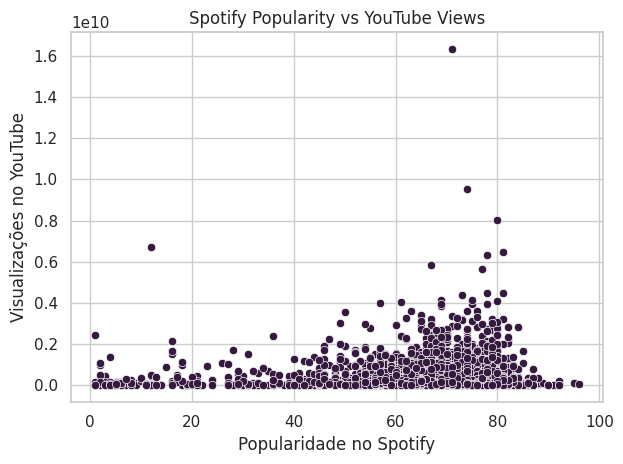

In [106]:
# Seleciona as vari√°veis
x = df_limpo['Spotify Popularity']
y = df_limpo['YouTube Views']

# Remove nulos
df_corr3 = df_limpo[['Spotify Popularity', 'YouTube Views']].dropna()

# Correla√ß√£o de Pearson
corr3, p_valor3 = pearsonr(df_corr3['Spotify Popularity'], df_corr3['YouTube Views'])

print(f"Correla√ß√£o de Pearson: {corr3:.2f}")
print(f"Valor-p: {p_valor3:.4f}")

# Gr√°fico de dispers√£o
sns.scatterplot(data=df_corr3, x='Spotify Popularity', y='YouTube Views')
plt.title('Spotify Popularity vs YouTube Views')
plt.xlabel('Popularidade no Spotify')
plt.ylabel('Visualiza√ß√µes no YouTube')
plt.tight_layout()
plt.show()

* Apesar do valor-p indicar signific√¢ncia estat√≠stica, a correla√ß√£o √© muito fraca (0.09). Portanto, rejeita-se H‚ÇÄ, mas na pr√°tica, a rela√ß√£o linear entre popularidade no Spotify e visualiza√ß√µes no YouTube √© muito pequena. Ou seja, n√£o h√° uma associa√ß√£o forte entre essas duas m√©tricas.

# 8. An√°lise Preditiva

8.1 **Regress√£o Linear Simples** - Usando a correla√ß√£o entre Track Score e Youtube Likes

In [111]:
# Sele√ß√£o de vari√°veis
df_rls = df_limpo[['YouTube Likes', 'Track Score']].dropna()

# Vari√°vel independente (X) e dependente (y)
X = df_rls[['YouTube Likes']]
y = df_rls['Track Score']

# Modelo de regress√£o linear simples
modelo_simples = LinearRegression()
modelo_simples.fit(X, y)

# Previs√µes
y_pred = modelo_simples.predict(X)

# M√©tricas
r2_simples = r2_score(y, y_pred)
rmse_simples = np.sqrt(mean_squared_error(y, y_pred))

print(f"R¬≤ (coeficiente de determina√ß√£o): {r2_simples:.4f}")
print(f"RMSE (erro quadr√°tico m√©dio): {rmse_simples:.2f}")

R¬≤ (coeficiente de determina√ß√£o): 0.0554
RMSE (erro quadr√°tico m√©dio): 37.44


**8.2 Regress√£o Linear M√∫ltipla** - Track Score com base em YouTube Likes, Spotify Popularity e TikTok Views:

In [113]:
# Sele√ß√£o de vari√°veis
df_rlm = df_limpo[['YouTube Likes', 'Spotify Popularity', 'TikTok Views', 'Track Score']].dropna()

X_mult = df_rlm[['YouTube Likes', 'Spotify Popularity', 'TikTok Views']]
y_mult = df_rlm['Track Score']

# Modelo de regress√£o m√∫ltipla
modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_mult, y_mult)

# Previs√µes
y_pred_mult = modelo_multiplo.predict(X_mult)

# M√©tricas
r2_multiplo = r2_score(y_mult, y_pred_mult)
rmse_multiplo = np.sqrt(mean_squared_error(y, y_pred))

print(f"R¬≤ (m√∫ltipla): {r2_multiplo:.4f}")
print(f"RMSE (m√∫ltipla): {rmse_multiplo:.2f}")

R¬≤ (m√∫ltipla): 0.1200
RMSE (m√∫ltipla): 37.44


* A regress√£o m√∫ltipla apresenta melhor desempenho em termos de R¬≤, dobrando a capacidade de explica√ß√£o do modelo em rela√ß√£o √† vers√£o simples. No entanto, o RMSE permaneceu o mesmo, indicando que mesmo com mais vari√°veis, o modelo ainda n√£o √© suficientemente preciso para previs√µes robustas.

* Isso mostra que o Track Score pode depender de muitos outros fatores n√£o considerados aqui (como estilo musical, g√™nero, etc).

* Ainda assim, esses modelos j√° s√£o √∫teis para detectar tend√™ncias iniciais e priorizar faixas que est√£o come√ßando a se destacar em plataformas.

**8.3 Aplicabilidade no contexto empresarial**

* Gravadoras podem usar esse tipo de an√°lise para identificar faixas promissoras em plataformas como YouTube e Spotify.

* Ajuda a estimar o impacto de campanhas de divulga√ß√£o cruzada (TikTok ‚Üí Spotify).

* Permite acompanhar tend√™ncias de sucesso e ajustar investimentos em promo√ß√£o.

# 9. Conclus√£o e Recomenda√ß√µes

**S√≠ntese dos principais achados:**

* A an√°lise descritiva e visual mostrou que o mercado musical digital apresenta uma alta concentra√ß√£o de sucesso em poucas faixas. M√∫sicas com bilh√µes de visualiza√ß√µes ou execu√ß√µes s√£o minoria, um reflexo da din√¢mica de viraliza√ß√£o nas plataformas.

* As correla√ß√µes entre plataformas digitais foram, em geral, fracas, o que indica que o sucesso em uma plataforma n√£o garante desempenho alto em outra.

* A √∫nica rela√ß√£o estatisticamente significativa e com alguma relev√¢ncia pr√°tica foi entre YouTube Likes e Track Score, apesar a for√ßa da correla√ß√£o seja considerada fraca, ela indica que m√∫sicas mais bem avaliadas tendem a receber mais curtidas no YouTube, ou vice-versa, sugerindo um v√≠nculo entre a recep√ß√£o do p√∫blico e a avalia√ß√£o geral da faixa.

* Os modelos preditivos (regress√£o linear simples e m√∫ltipla) apresentaram baixa capacidade explicativa (R¬≤ abaixo de 0.13), o que refor√ßa a ideia de que o desempenho de uma m√∫sica depende de muitos outros fatores al√©m dos dados analisados.



**9.1 Impacto potencial das descobertas para o setor musical:**

* As an√°lises mostram que m√©tricas isoladas n√£o explicam sozinhas o sucesso de uma m√∫sica, mas podem ser √∫teis para detectar tend√™ncias iniciais de engajamento. Isso √© valioso para gravadoras, produtoras e artistas independentes que querem otimizar o investimento em divulga√ß√£o e fortalecer sua presen√ßa em plataformas espec√≠ficas.

**9.2 Recomenda√ß√µes pr√°ticas**
* Monitoramento cruzado de plataformas: acompanhar m√©tricas simult√¢neas em TikTok, YouTube e Spotify pode ajudar a prever potenciais "hits" e agir rapidamente com estrat√©gias promocionais.

* Investir na produ√ß√£o de conte√∫do que gere engajamento: j√° que curtidas no YouTube se correlacionam com melhor avalia√ß√£o, a√ß√µes para estimular likes e coment√°rios podem refor√ßar a percep√ß√£o de qualidade da m√∫sica.

* Aprofundar o modelo com vari√°veis qualitativas: incorporar dados como g√™nero musical, idioma, presen√ßa em campanhas de marketing ou colabora√ß√£o com artistas famosos pode melhorar significativamente os modelos preditivos.

* Foco em microsegmenta√ß√£o de playlists: embora Spotify Popularity n√£o seja altamente preditiva, ela pode indicar o momento certo de impulsionar uma m√∫sica por meio de inclus√£o em playlists estrat√©gicas.